In [1]:
ls

BlueOwl_MachineLearning_Track.ipynb  data.zip
Untitled.ipynb                       test.csv
__MACOSX/                            train.csv
data-science-instructions.pdf


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [49]:
from sklearn.tree import DecisionTreeClassifier, RandomForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [33]:
train['source'] = 'train'
test['source'] = 'test'
data = train.append(test, ignore_index=True)

In [8]:
train.columns, test.columns

(Index(['age', 'cost_of_ad', 'device_type', 'gender',
        'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
        'prior_ins_tenure', 'outcome'],
       dtype='object'), Index(['age', 'cost_of_ad', 'device_type', 'gender',
        'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
        'prior_ins_tenure'],
       dtype='object'))

In [9]:
train.shape, test.shape

((10000, 10), (10000, 9))

In [13]:
train.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,37.991800,0.004666,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.00000,22.000000,1.0000


In [14]:
train.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [20]:
train['gender'].value_counts(normalize=True)

F    0.510739
M    0.489261
Name: gender, dtype: float64

In [17]:
test.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.029200,0.004668,0.500900,58232.104800,1.486300,2.009100,5.319800
std,12.896921,0.000836,0.500024,17318.192722,0.499837,0.817242,5.019487
min,16.000000,0.003173,0.000000,16124.000000,1.000000,1.000000,0.000000
25%,27.000000,0.004000,0.000000,45575.250000,1.000000,1.000000,1.000000
50%,38.000000,0.004609,1.000000,58271.000000,1.000000,2.000000,4.000000
75%,49.000000,0.005175,1.000000,70438.750000,2.000000,3.000000,8.000000
max,60.000000,0.007049,1.000000,99916.000000,2.000000,3.000000,22.000000


In [18]:
test.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [19]:
test['gender'].value_counts(normalize=True)

F    0.503128
M    0.496872
Name: gender, dtype: float64

In [28]:
train[train['gender'].isnull()]['outcome'].value_counts(normalize=True)

0    0.966543
1    0.033457
Name: outcome, dtype: float64

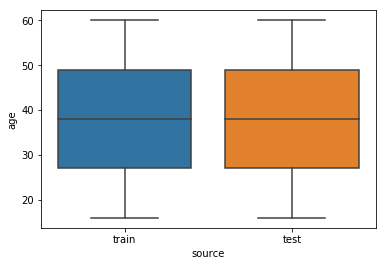

In [34]:
sns.boxplot(x = data['source'], y = data['age'])

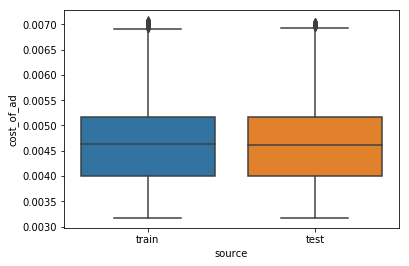

In [35]:
sns.boxplot(x = data['source'], y = data['cost_of_ad'])

In [29]:
train.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome'],
      dtype='object')

In [41]:
data.groupby('source')['in_initial_launch_location'].value_counts(normalize=True)

source  in_initial_launch_location
test    1                             0.5009
        0                             0.4991
train   0                             0.5025
        1                             0.4975
Name: in_initial_launch_location, dtype: float64

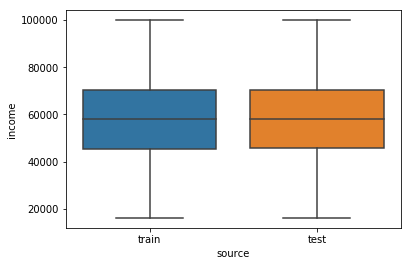

In [42]:
sns.boxplot(x = data['source'], y = data['income'])

In [46]:
data['n_drivers'].value_counts()

1    10167
2     9833
Name: n_drivers, dtype: int64

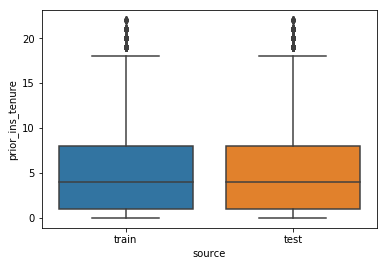

In [48]:
sns.boxplot(x = data['source'], y = data['prior_ins_tenure'])